<a href="https://colab.research.google.com/github/FatemaKapadia/TaskOffloading/blob/main/FYP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [97]:
!pip install pygmo
!pip install nlopt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [98]:
class end_user:
  def __init__(self, x_pos, y_pos, vel):
    self.x = x_pos
    self.y = y_pos
    self.vel = vel

In [99]:
class fog_node:
  def __init__(self, x_pos, y_pos):
    self.x = x_pos
    self.y = y_pos

In [100]:
class sdn:
  def __init__(self, x_pos, y_pos):
    self.x = x_pos
    self.y = y_pos

In [110]:
import numpy as np
import math as mt
import random
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
N = 1000
M = 20
P = 3

In [102]:
eus = {}
for i in range(N):
  x_pos = random.uniform(0, 1000)
  y_pos = random.uniform(0, 1000)
  eus[i] = end_user(x_pos, y_pos, 0)

In [103]:
def kmeans_clustering(data, n, m):
  features = []
  for i in range(n):
    features.append([data[i].x, data[i].y])
  features = np.array(features)

  kmeans = KMeans(
    init="k-means++", n_clusters=m, n_init=10, max_iter=300
  )

  labels = kmeans.fit_predict(features)
  centroids = kmeans.cluster_centers_
  return features, labels, centroids

In [104]:
eus_features, eus_labels, fn_pos = kmeans_clustering(eus, N, M)

In [105]:
fns = {}
for i in range(M):
  x_pos = fn_pos[i][0]
  y_pos = fn_pos[i][1]
  fns[i] = fog_node(x_pos, y_pos)

In [106]:
fns_features, fns_labels, sdn_pos = kmeans_clustering(fns, M, P)

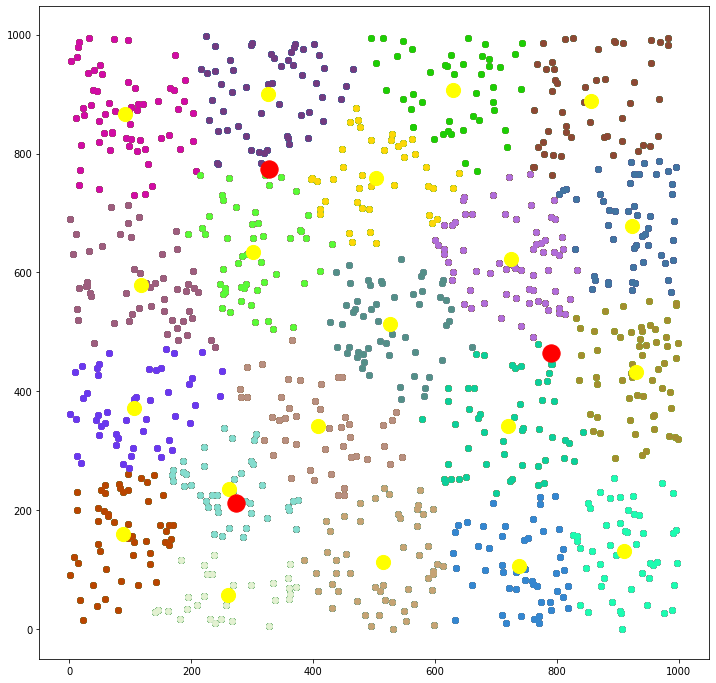

In [112]:
#plotting the results
for i in eus_labels:
  color = ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])]
  plt.scatter(eus_features[eus_labels == i , 0] , eus_features[eus_labels == i , 1] , label = i, c = color)

plt.scatter(fn_pos[:, 0], fn_pos[:, 1], s=200, c='yellow', label = 'Fog Nodes')
plt.scatter(sdn_pos[:, 0], sdn_pos[:, 1], s=300, c='red', label = 'SDN Controllers')
plt.rcParams["figure.figsize"] = (12,12)
plt.show()